# Logistic Regression: Lead Scoring

### Problem Statement:

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. 

### Data:

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.

### Goals:

To build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [1]:
# Ignoring warnings.
import warnings
warnings.simplefilter("ignore")

In [2]:
# Importing all necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1)

In [3]:
# Reading the dataset

edu_df1= pd.read_csv('leads.csv')
edu_df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Data Understanding

In [4]:
# Shape of the dataset

edu_df1.shape

(9240, 37)

The dataset is having 9240 rows and 37 columns

In [5]:
# let's view the data information like what are the datatypes of the variables

edu_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

There are 7 numerical variables columns and remaining 30 columns are having categorical variables.

In [6]:
# Let's describe the data and have some statistical idea about the dataset like outliers, mean, std etc.

edu_df1.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


Some variable columns like 'totalVisits','Total Time Spent on Website' and 'Page Views Per Visit' are having outliers.

Now, from our above observations from two tables we can see that there are some count mismatch and also some columns are redundant. Hence, first we will try to remove those redundant columns and after that we will check the missing values in the dataset. 

# Cleaning the dataset

In [7]:
"""
Dropping redundant columns like 'Prospect ID','Lead Number','Country', 'I agree to pay the amount through cheque' and 
'a free copy of Mastering The Interview'.
"""

red_cols= ['Prospect ID','Lead Number','Country','I agree to pay the amount through cheque',
           'A free copy of Mastering The Interview','City']

edu_df= edu_df1.drop(red_cols,1)

In [8]:
edu_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,02.Medium,02.Medium,15.0,15.0,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,02.Medium,02.Medium,15.0,15.0,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,02.Medium,01.High,14.0,20.0,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,02.Medium,01.High,13.0,17.0,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,02.Medium,01.High,15.0,18.0,Modified


Now, there are some columns/categorical variables having label as 'Select' which means the customer was not selected any option hence it is better to put it as null value - Because there was no suitable option present to select for the customer searching for. 

In [9]:
edu_df.shape

(9240, 31)

Finding out which columns/categories is having 'Select' label.

In [10]:
# Creating a for loop and the required columns are appended into a new list

cols= list(edu_df.columns)
test= ['Select']
Select_cols= []
for i in range(len(cols)):
    if len(edu_df[cols[i]].isin(test).unique())>1:
        Select_cols.append(cols[i])

# columns having "Select"
Select_cols

['Specialization', 'How did you hear about X Education', 'Lead Profile']

The columns' having 'Select' as a label are **'Specialization', 'How did you hear about X Education', 'Lead Profile'.**

In [11]:
for col in Select_cols:
    edu_df[col]= edu_df[col].replace(['Select'], value= np.nan)

All the 'Select' values have been replaced from the dataset.

In [12]:
# Check for missing values

round(edu_df.isnull().sum()/len(edu_df)*100,2)

Lead Origin                                      0.00 
Lead Source                                      0.39 
Do Not Email                                     0.00 
Do Not Call                                      0.00 
Converted                                        0.00 
TotalVisits                                      1.48 
Total Time Spent on Website                      0.00 
Page Views Per Visit                             1.48 
Last Activity                                    1.11 
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                           0.00 
Magazine                                         0.00 
Newspaper Article                                0.00 
X Education Forums                               0.00 
Newspaper                                        0.00 
Digital Ad

Some columns are having more than 30% of missing values, so it is better to remove these columns.

In [13]:
# Droping Columns having more than 30% of missing values

drop_cols= edu_df.isnull().sum()
drop_cols= drop_cols[drop_cols.values/len(edu_df)>0.30]
drop_cols

Specialization                        3380
How did you hear about X Education    7250
Tags                                  3353
Lead Quality                          4767
Lead Profile                          6855
Asymmetrique Activity Index           4218
Asymmetrique Profile Index            4218
Asymmetrique Activity Score           4218
Asymmetrique Profile Score            4218
dtype: int64

In [14]:
# Dropping columns and checking the remaining columns for missing values

drop_columns= list(drop_cols.keys())
edu_df= edu_df.drop(drop_columns,1)  
round(edu_df.isnull().sum()/len(edu_df)*100,2)

Lead Origin                                      0.00 
Lead Source                                      0.39 
Do Not Email                                     0.00 
Do Not Call                                      0.00 
Converted                                        0.00 
TotalVisits                                      1.48 
Total Time Spent on Website                      0.00 
Page Views Per Visit                             1.48 
Last Activity                                    1.11 
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                           0.00 
Magazine                                         0.00 
Newspaper Article                                0.00 
X Education Forums                               0.00 
Newspaper                                        0.00 
Digital Advertisement                            0.00 
Through Recommendations                          0.00 
Receive Mo

In [15]:
edu_df.shape

(9240, 22)

Columns having more than 30% of missing values were removed.

In [16]:
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   What is your current occupation                6550 

In [17]:
# Segregation of Numerical and Categorical Variables/Columns

cat_col = edu_df.select_dtypes(include = ['object']).columns
num_col = edu_df.select_dtypes(exclude = ['object']).columns

In [18]:
cat_col

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Last Notable Activity'],
      dtype='object')

In [19]:
num_col

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

Now, for categorical columns, let's impute null values by their respective modes.

In [20]:
for col in cat_col:
    edu_df[col].fillna(edu_df[col].mode()[0], inplace=True)

In [21]:
round(edu_df.isnull().sum()/len(edu_df)*100,2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations                          0.00
Receive More Updates About O

Now all the missing values have been handled in the categorical columns.

In [22]:
# checking value counts for all the categorical columns.

for col in cat_col:
    print("Column Name: ", col)
    print('\n')
    print(edu_df[col].value_counts())
    print("========================================================================\n")

Column Name:  Lead Origin


Landing Page Submission    4886
API                        3580
Lead Add Form              718 
Lead Import                55  
Quick Add Form             1   
Name: Lead Origin, dtype: int64

Column Name:  Lead Source


Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference            534 
Welingak Website     142 
Referral Sites       125 
Facebook             55  
bing                 6   
google               5   
Click2call           4   
Live Chat            2   
Social Media         2   
Press_Release        2   
blog                 1   
youtubechannel       1   
Pay per Click Ads    1   
welearnblog_Home     1   
WeLearn              1   
testone              1   
NC_EDM               1   
Name: Lead Source, dtype: int64

Column Name:  Do Not Email


No     8506
Yes    734 
Name: Do Not Email, dtype: int64

Column Name:  Do Not Call


No     9238
Yes    2   
Name: Do Not Call, dtype: int64



We found one column 'Lead Source' is having same label name 'Google' but in different format 'google'. We need to make the column data consistent.

In [23]:
edu_df['Lead Source']= edu_df['Lead Source'].replace(['google'], 'Google')

In [24]:
edu_df['Lead Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference            534 
Welingak Website     142 
Referral Sites       125 
Facebook             55  
bing                 6   
Click2call           4   
Live Chat            2   
Social Media         2   
Press_Release        2   
youtubechannel       1   
blog                 1   
welearnblog_Home     1   
WeLearn              1   
Pay per Click Ads    1   
testone              1   
NC_EDM               1   
Name: Lead Source, dtype: int64

Now, all categorical columns are in good shape.

Before we impute missing values in numerical columns, we need to treat outliers in the data.

## Checking for Outliers

In [25]:
round(edu_df.describe(percentiles=[0.15,0.35,0.55,0.75,0.95]),2)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.00,9103.00,9240.00,9103.00
mean,0.39,3.45,487.70,2.36
std,0.49,4.85,548.02,2.16
min,0.00,0.00,0.00,0.00
15%,0.00,0.00,0.00,0.00
35%,0.00,2.00,98.00,1.50
50%,0.00,3.00,248.00,2.00
55%,0.00,3.00,305.00,2.00
75%,1.00,5.00,936.00,3.00
95%,1.00,10.00,1562.00,6.00


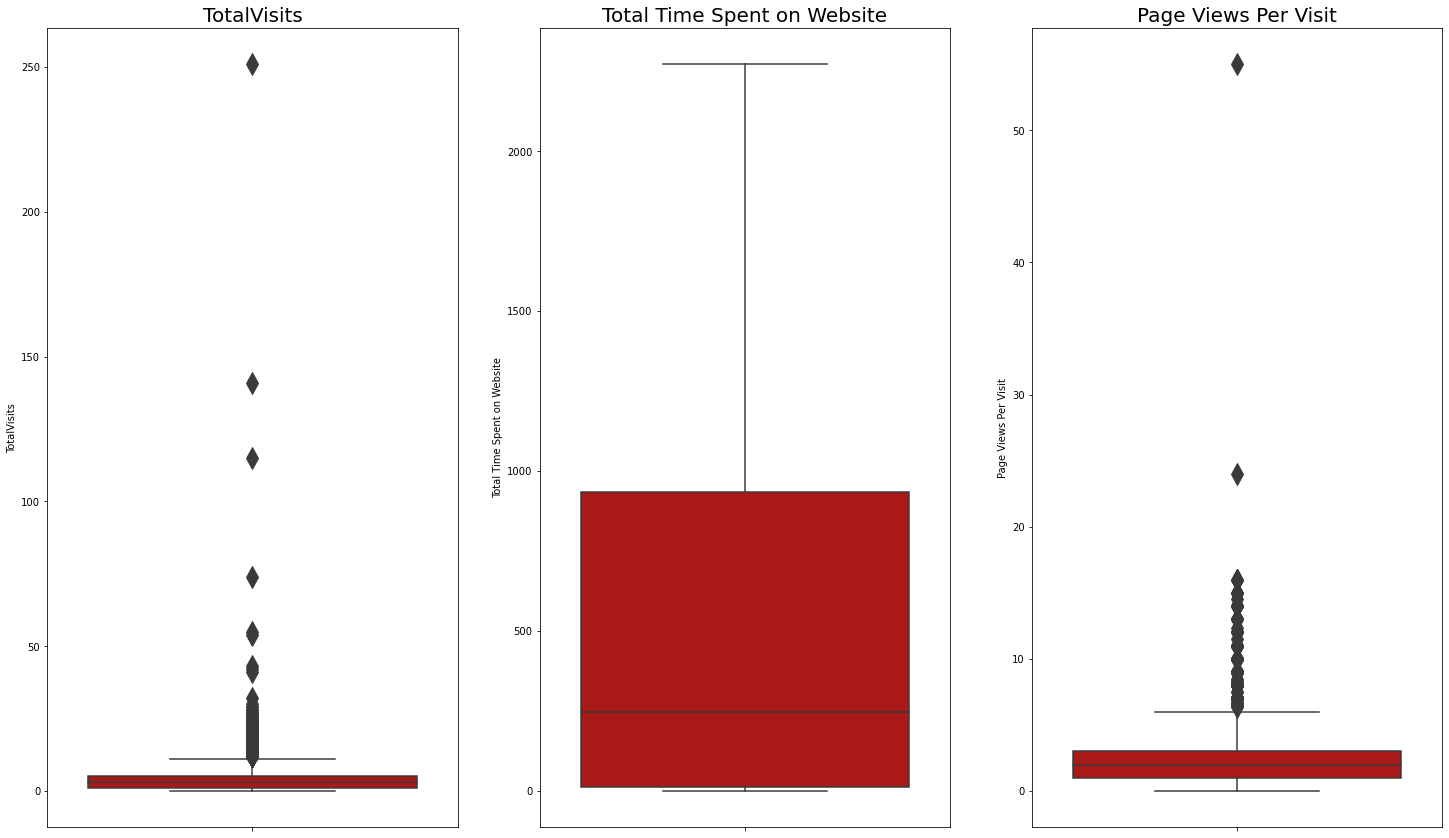

In [26]:
# Using boxplot to check for outliers.

plt.figure(figsize=(25,50))
plt.tight_layout()
# sns.set_context('talk')

# Title names for the columns in the dataset

col={0:'TotalVisits',1:'Total Time Spent on Website',2:'Page Views Per Visit'}

# Visualising the outliers with boxplot for all the variables 

for i in range(3):
    plt.subplot(3,3,i+1)
    plt.title(col[i],fontsize= 20)
    sns.boxplot(x=edu_df[col[i]], data= edu_df, palette= 'gist_heat', orient= 'v', fliersize= 15)

As we can see there are outliers in 2 variables 'TotalVisits' and 'Page Views Per Visit'.

Now as per business requirements we cannot drop these outliers because it may impact our analysis/model. We can handle this by upper capping the columns due to nature of the data in these columns.

In [27]:
'''Defining a function 'capping' which will handle the outliers.
This function will take 2 arguments dataframe, column_name.'''

def capping(df, col):
    q1= df[col].quantile(0.25)
    q3= df[col].quantile(0.75)
    iqr= q3-q1
    
    upper_cap= q3+1.5*iqr
    df.loc[(df[col] > upper_cap), col] = upper_cap
    
    return df

In [28]:
edu_df = capping(edu_df, 'TotalVisits')
edu_df = capping(edu_df, 'Page Views Per Visit')

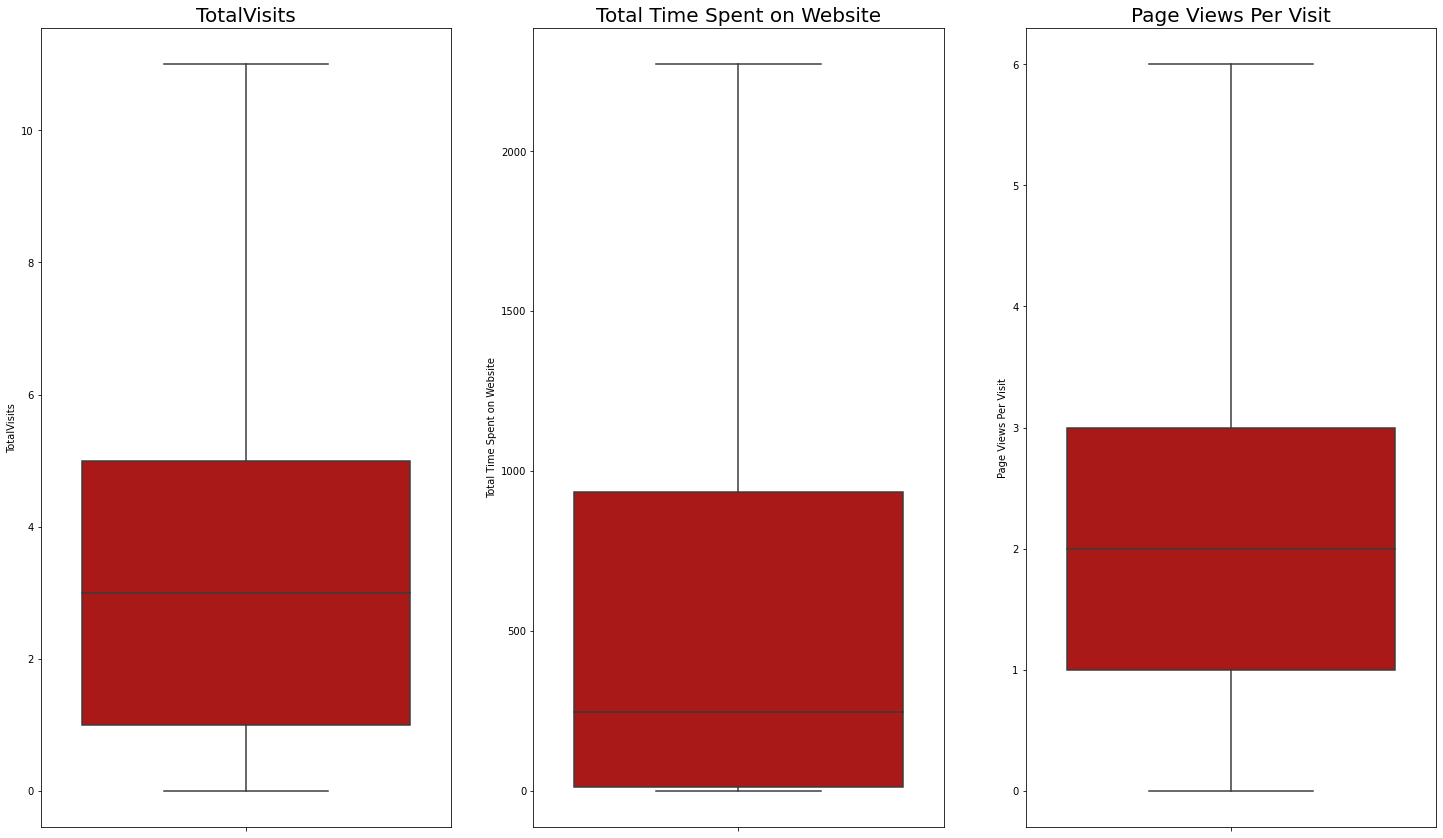

In [29]:
# Setting size of figure, context and gridlines

plt.figure(figsize=(25,50))
plt.tight_layout()
# sns.set_context('talk')

# Title names for the columns in the dataset

col={0:'TotalVisits',1:'Total Time Spent on Website',2:'Page Views Per Visit'}

# Visualising the outliers with boxplot for all the variables 

for i in range(3):
    plt.subplot(3,3,i+1)
    plt.title(col[i],fontsize= 20)
    sns.boxplot(x=edu_df[col[i]], data= edu_df, palette= 'gist_heat', orient= 'v', fliersize= 15)

Outliers handled.

## Handling missing values in numerical columns.

Due to the nature of data in these columns, it would be correct to impute the missing values in these columns by their respective modes. Note that null vlaues are less than 2% of the total length of the data set.

In [30]:
for col in num_col:
    edu_df[col].fillna(edu_df[col].mode()[0], inplace=True)

In [31]:
round(edu_df.isnull().sum()/len(edu_df)*100,2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                          0.0
Receive More Updates About Our Courses        

All missing values and outliers handled successfully in the complete dataset.

# Data Transformation

Assigning numerical variables to categories with **'Yes' to 1 and 'No' to 0** or **converting binary variables (Yes/No) to (1/0)**

In [32]:
cat_col

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Last Notable Activity'],
      dtype='object')

Separating out boolean (Yes/No) columns.

In [33]:
cat_col_bool= []
for col in cat_col:
    if len(edu_df[col].value_counts()) < 3:
        cat_col_bool.append(col)
        
cat_col_bool

['Do Not Email',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content']

Rechecking their values.

In [34]:
for col in cat_col_bool:
    print("Column Name: ", col)
    print('\n')
    print(edu_df[col].value_counts())
    print("========================================================================\n")

Column Name:  Do Not Email


No     8506
Yes    734 
Name: Do Not Email, dtype: int64

Column Name:  Do Not Call


No     9238
Yes    2   
Name: Do Not Call, dtype: int64

Column Name:  Search


No     9226
Yes    14  
Name: Search, dtype: int64

Column Name:  Magazine


No    9240
Name: Magazine, dtype: int64

Column Name:  Newspaper Article


No     9238
Yes    2   
Name: Newspaper Article, dtype: int64

Column Name:  X Education Forums


No     9239
Yes    1   
Name: X Education Forums, dtype: int64

Column Name:  Newspaper


No     9239
Yes    1   
Name: Newspaper, dtype: int64

Column Name:  Digital Advertisement


No     9236
Yes    4   
Name: Digital Advertisement, dtype: int64

Column Name:  Through Recommendations


No     9233
Yes    7   
Name: Through Recommendations, dtype: int64

Column Name:  Receive More Updates About Our Courses


No    9240
Name: Receive More Updates About Our Courses, dtype: int64

Column Name:  Update me on Supply Chain Content


No    9240
Name: Upd

Boolean/ Binary categorical columns have been sucessfully captured.
<br>Subsituting 1 and 0 for Yes and No respectively.

In [35]:
# Yes : 1 , No : 0

category= {"No":0,"Yes":1}    # creating dictionary for two categories

for col in cat_col_bool:
    edu_df[col]=edu_df[col].map(category)

Checking the  changes...

In [36]:
for col in cat_col_bool:
    print("Column Name: ", col)
    print('\n')
    print(edu_df[col].value_counts())
    print("========================================================================\n")

Column Name:  Do Not Email


0    8506
1    734 
Name: Do Not Email, dtype: int64

Column Name:  Do Not Call


0    9238
1    2   
Name: Do Not Call, dtype: int64

Column Name:  Search


0    9226
1    14  
Name: Search, dtype: int64

Column Name:  Magazine


0    9240
Name: Magazine, dtype: int64

Column Name:  Newspaper Article


0    9238
1    2   
Name: Newspaper Article, dtype: int64

Column Name:  X Education Forums


0    9239
1    1   
Name: X Education Forums, dtype: int64

Column Name:  Newspaper


0    9239
1    1   
Name: Newspaper, dtype: int64

Column Name:  Digital Advertisement


0    9236
1    4   
Name: Digital Advertisement, dtype: int64

Column Name:  Through Recommendations


0    9233
1    7   
Name: Through Recommendations, dtype: int64

Column Name:  Receive More Updates About Our Courses


0    9240
Name: Receive More Updates About Our Courses, dtype: int64

Column Name:  Update me on Supply Chain Content


0    9240
Name: Update me on Supply Chain Content, dty

Data sucessfully transformed.

In [37]:
# Since the following columns have only one value "No" in all the rows, we can eliminate the columns :

# a) Magazine
# b) Receive More Updates About Our Courses
# c) Update me on Supply Chain Content
# d) Get updates on DM Content

redundant= ['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','Magazine']

edu_df=edu_df.drop(redundant,1)

In [38]:
# Segregation of Numerical and Categorical Variables/Columns

cat_col = edu_df.select_dtypes(include = ['object']).columns
num_col = edu_df.select_dtypes(exclude = ['object']).columns

In [39]:
cat_col

Index(['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'Last Notable Activity'],
      dtype='object')

In [40]:
num_col

Index(['Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations'],
      dtype='object')

# Data Analysis

Plotting Distplot to have a road perspective of the data distribution in numerical columns.

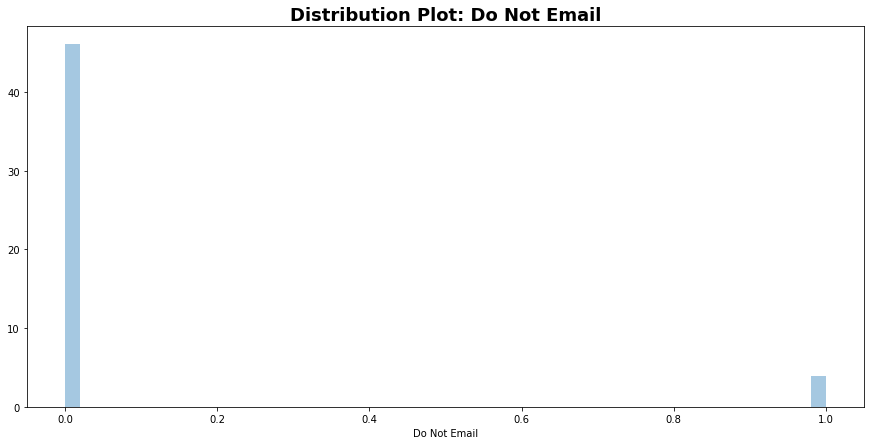

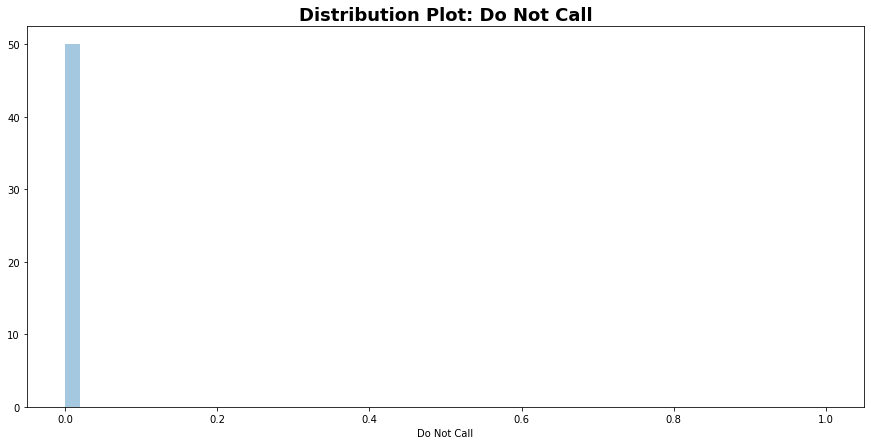

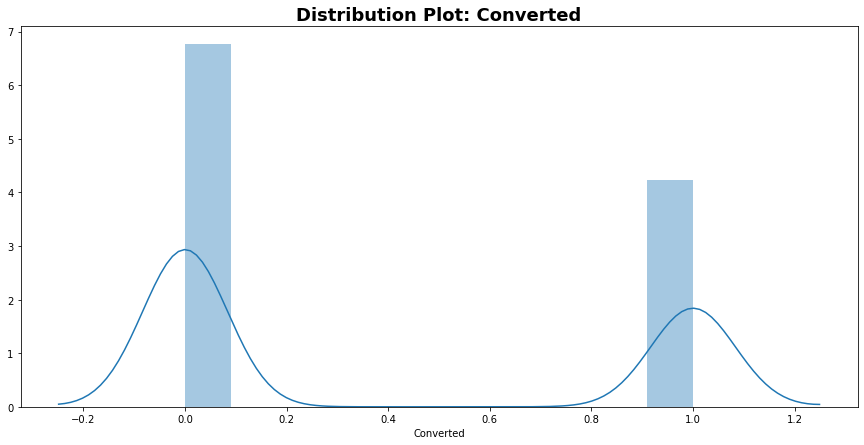

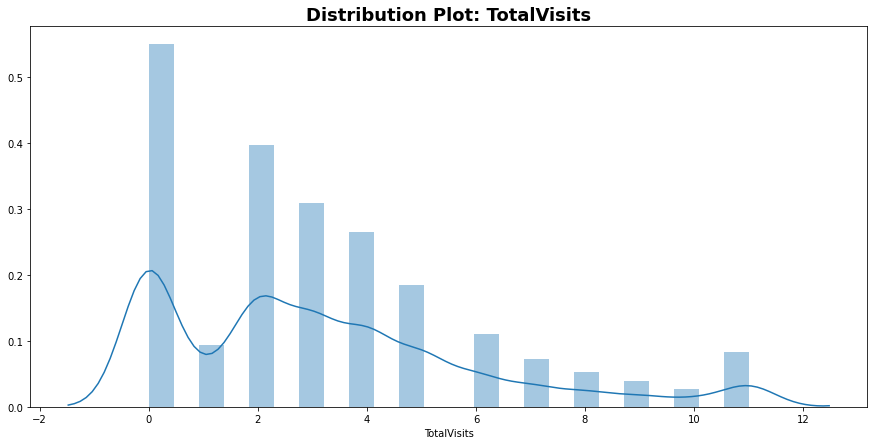

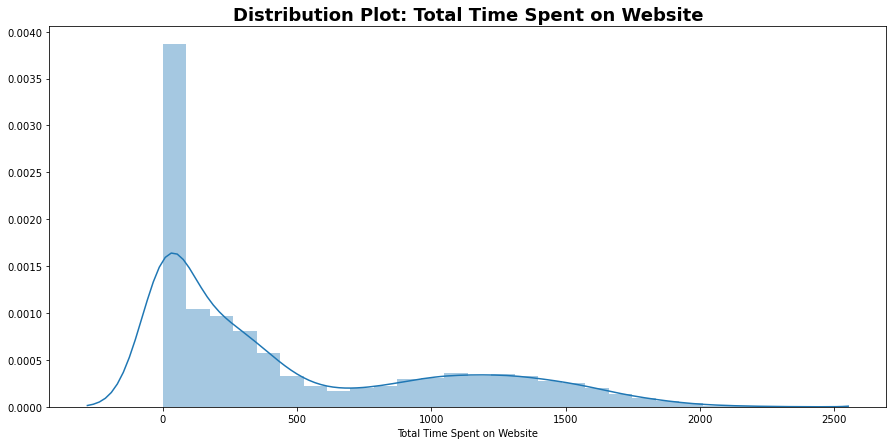

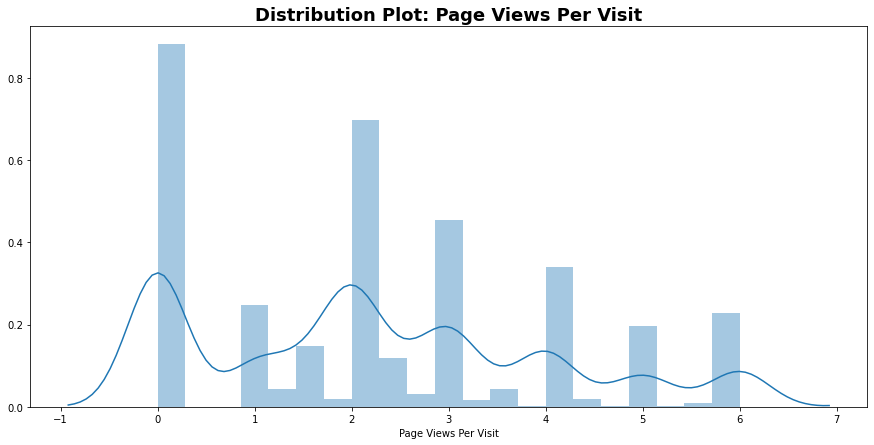

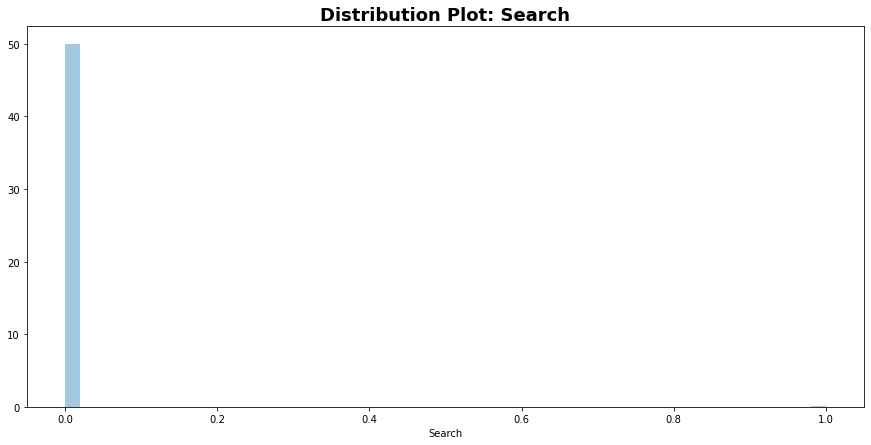

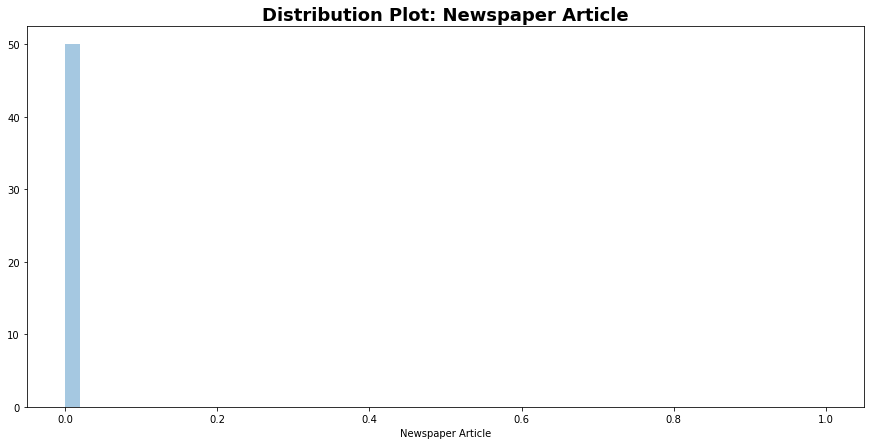

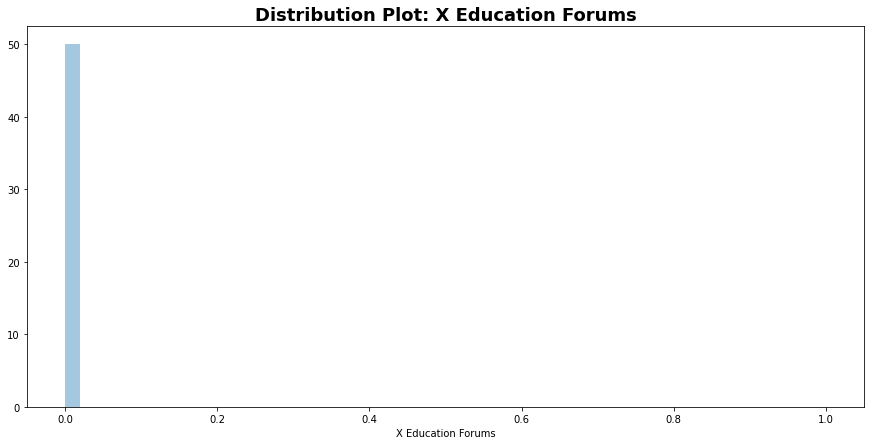

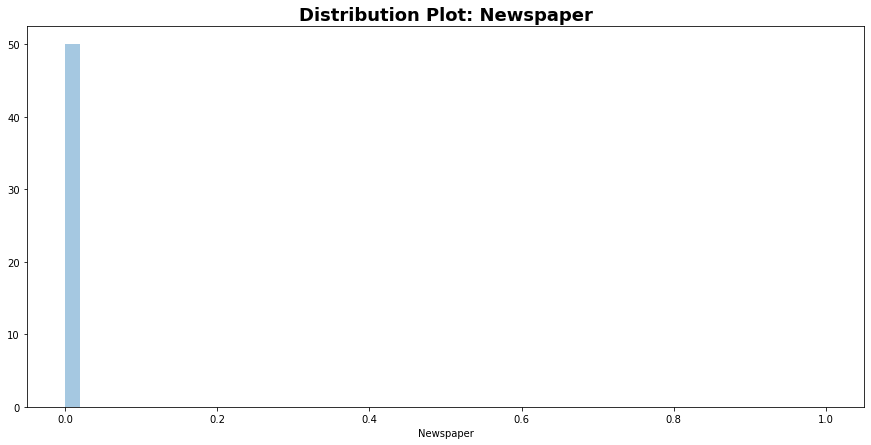

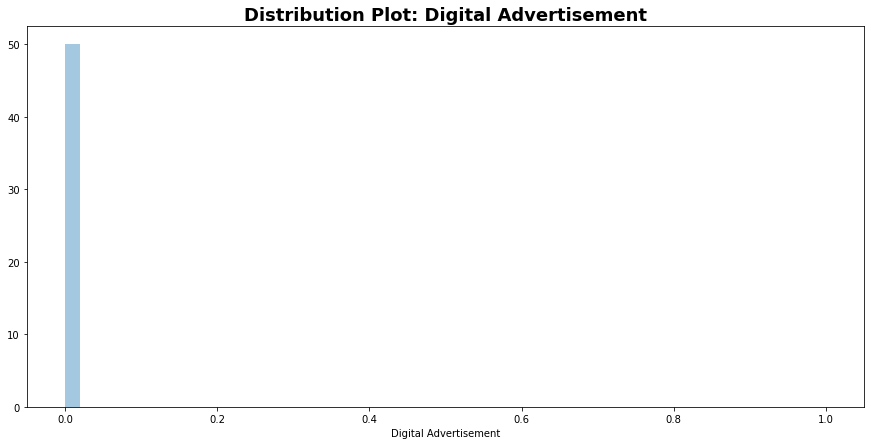

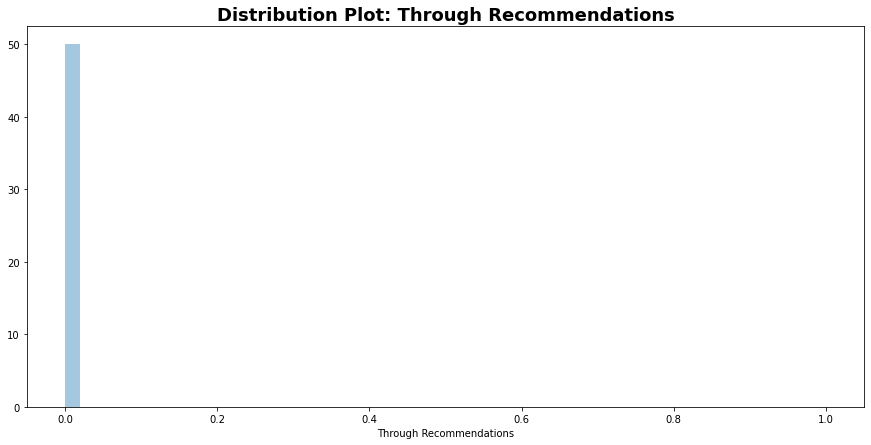

In [41]:
for c in num_col:
    plt.figure(figsize=(15,7))
    plt.title("Distribution Plot: %s" % c,fontsize=18, fontweight='bold')
    sns.distplot(edu_df[c])
    plt.show();

We can see that there has been a conversion of around 40%.<br><br>Let us try and understand the data now based on each columns effect on the conversion rates

In [42]:
# Creating function to plot coutplots of various categorical variables against Converted column.

def cat_converted(col):
    plot = sns.catplot(x=col, hue = "Converted", kind="count", data=edu_df, palette="Set1", aspect = 3.5);

    plt.title(col +' vs. Converted', fontsize = 20)
    plt.xlabel(col, fontsize = 16)
    plt.ylabel("Count", fontsize = 16)
    plt.xticks(rotation=90)

    # Print the counts

    ax = plot.facet_axis(0,0)
    for p in ax.patches:

        if np.isnan(p.get_height()):
            height = 0
        else:
            height = p.get_height()

        height = int(height)
        ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
    
    plt.show()

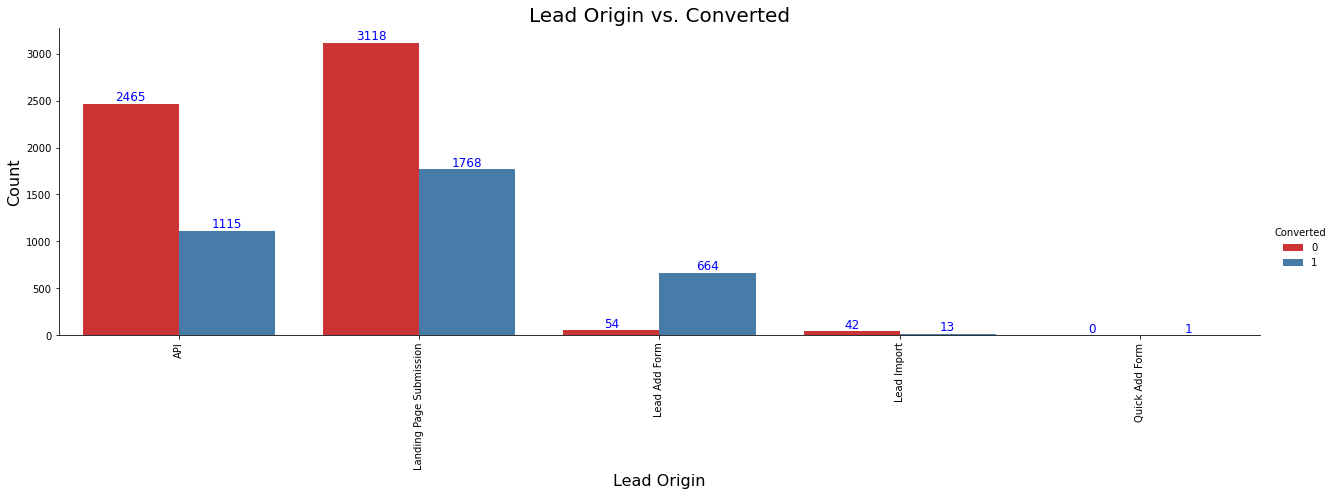

In [43]:
cat_converted('Lead Origin')

From the above graph, it can be seen that the maximum conversion happened from Landing Page Submission.<br>
Also there was only one request from quick add form which got converted.

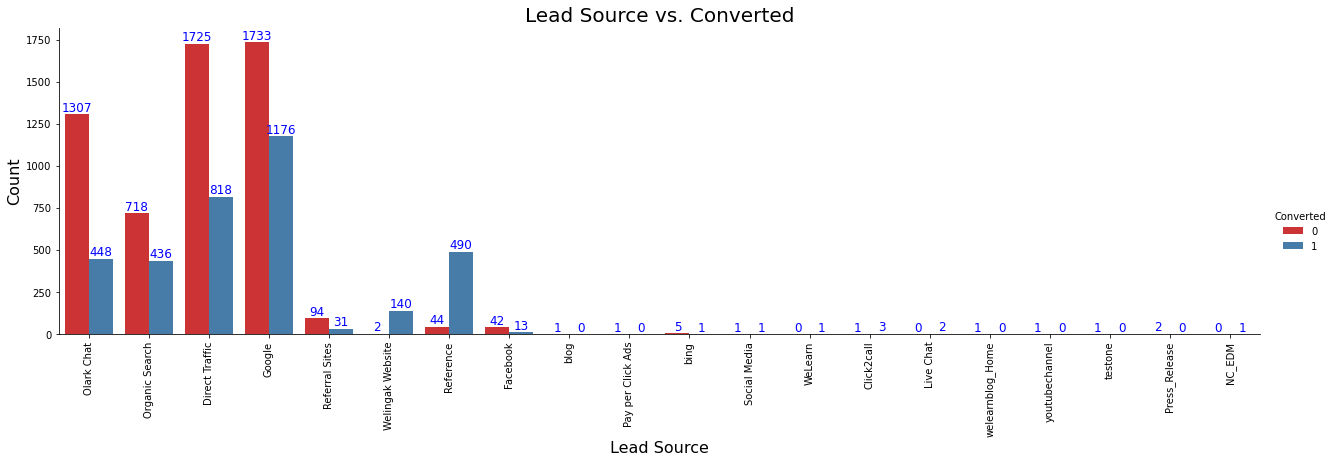

In [44]:
cat_converted('Lead Source')

From the above graph, it can be seen that major conversion in the lead source is from Google.

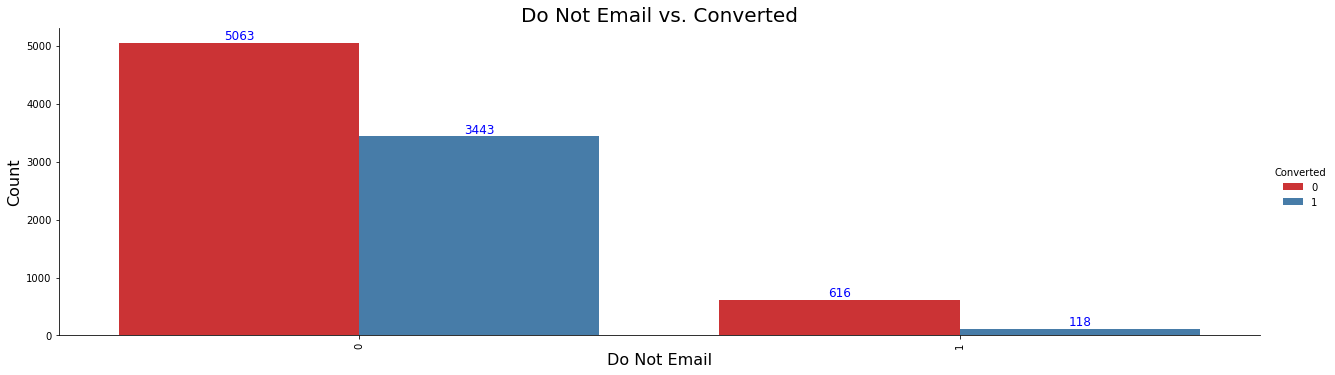

In [45]:
cat_converted('Do Not Email')

Based on the above graph, major conversion has happend from the emails that have been sent.

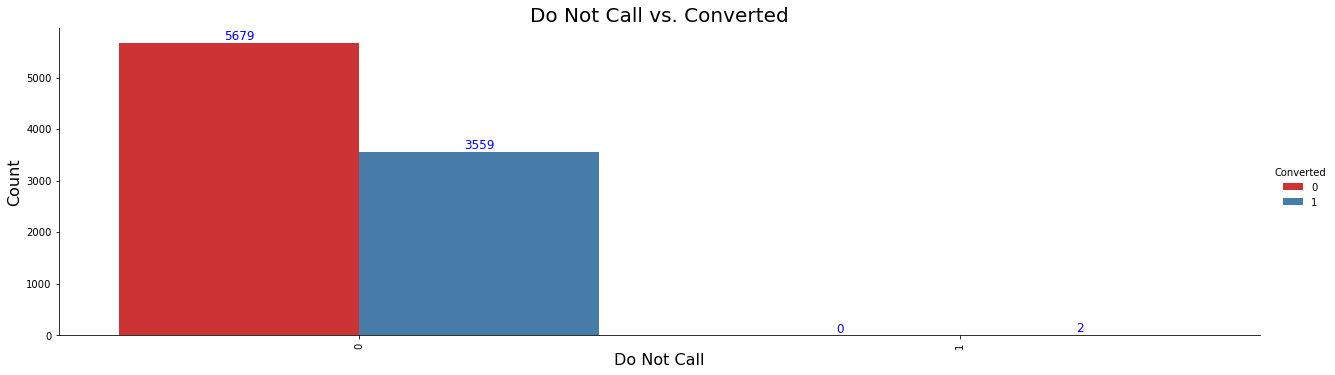

In [46]:
cat_converted('Do Not Call')

From the above graph , it can be noticed that major conversions happened when calls were made.<br>
However, it can also be seen that 2 leads opted for "Do Not Call", but they still got converted.

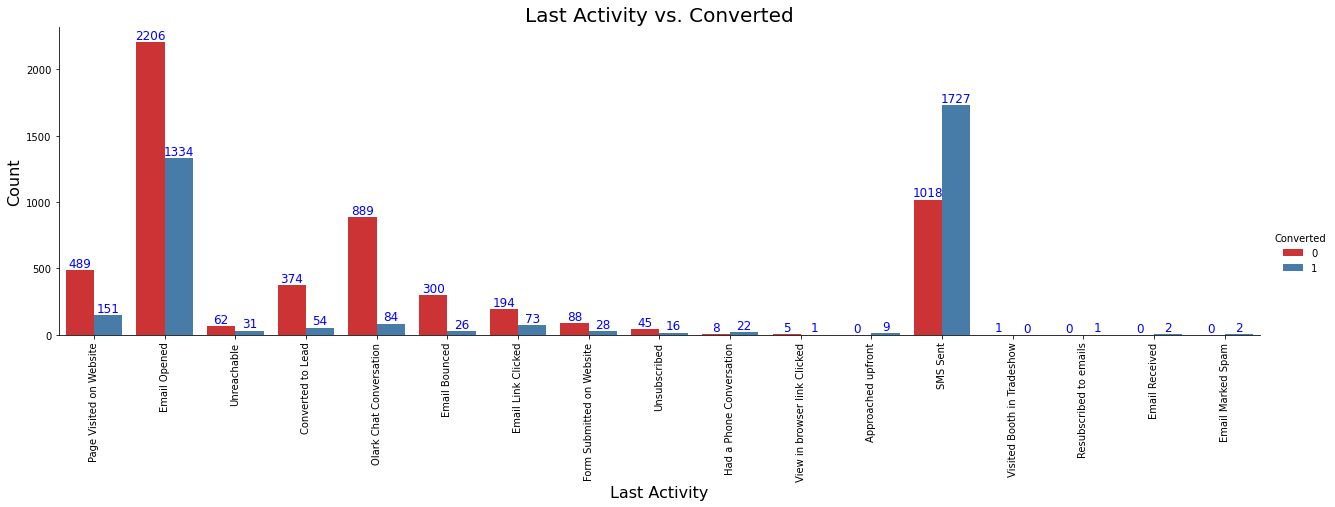

In [47]:
cat_converted('Last Activity')

As per the above graph, Last Activity value of 'SMS Sent' had more conversions.

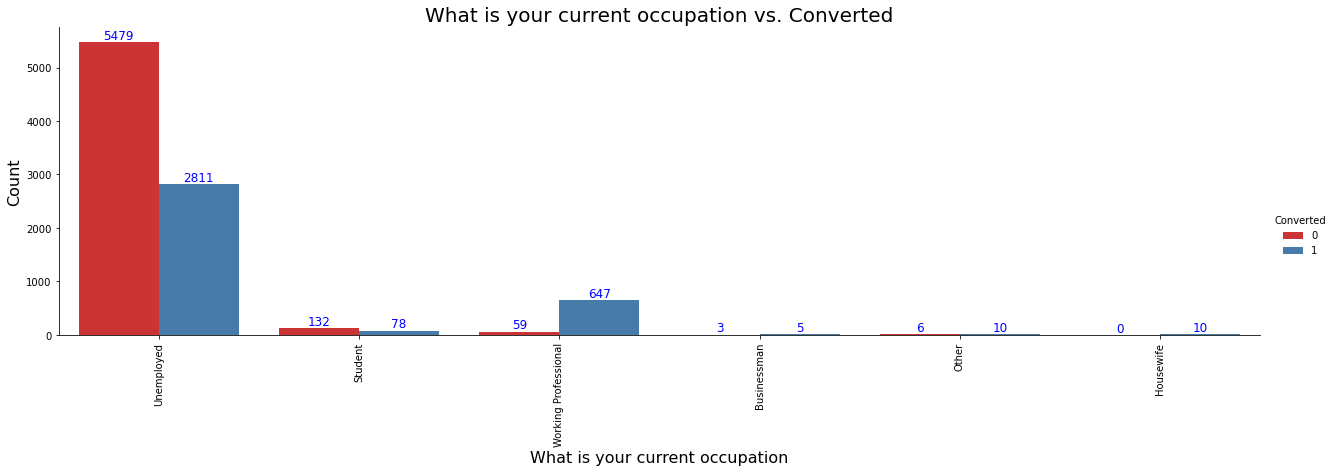

In [48]:
cat_converted('What is your current occupation')

More conversion happend with people who are unemployed. It can also be noticed from the above data that 
    - Out of 7 business men, 4 got converted
    - Out 10 housewives, all 10 leads got converted.

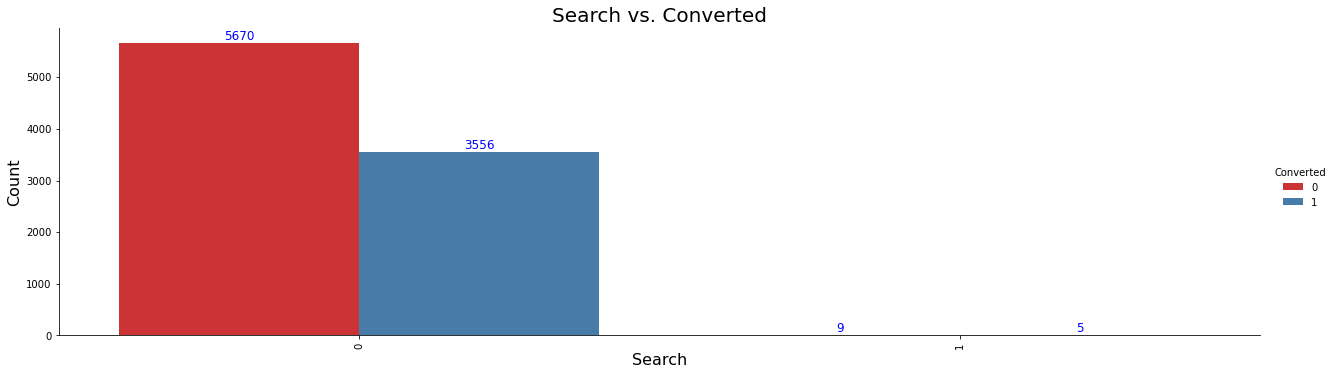

In [49]:
cat_converted('Search')

Conversions are high on leads who are not through search.

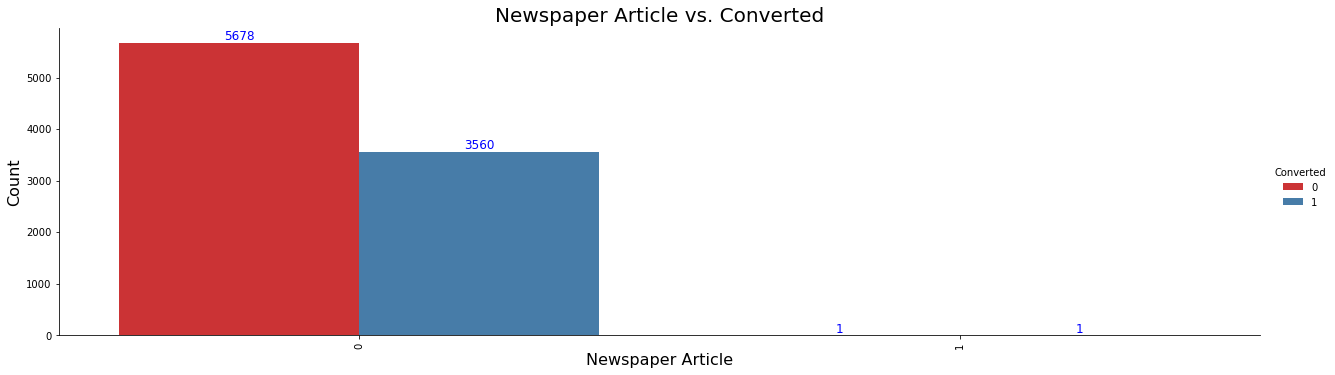

In [50]:
# Newspaper Article

cat_converted('Newspaper Article')

Since "Newspaper Article" column now has only one value for all rows - "No" , it is safe to drop this column.

In [51]:
# Dropping Newspaper Article

edu_df = edu_df.drop(['Newspaper Article'], axis=1)

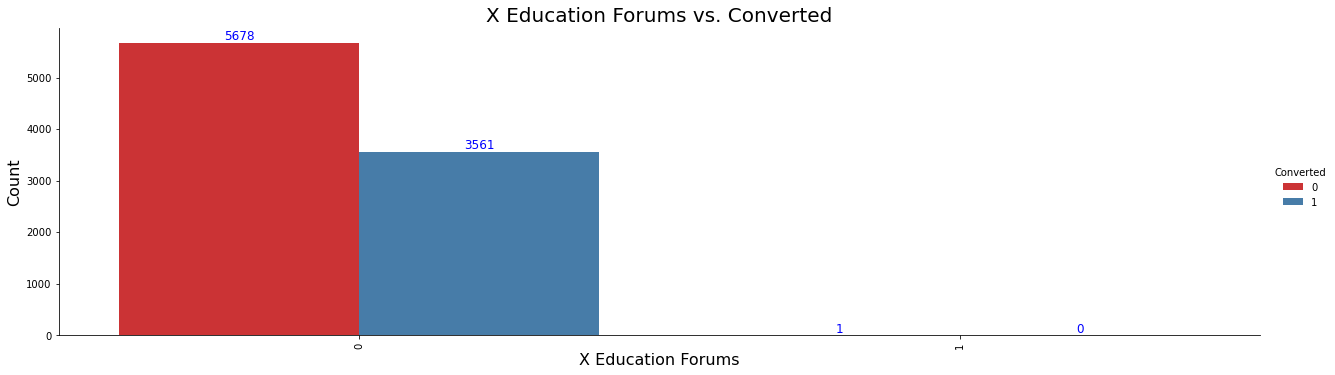

In [52]:
# X Education Forums

cat_converted('X Education Forums')

Since "X Education Forums" column now has only one value for all rows - "No" , it is safe to drop this column.

In [53]:
# Dropping X Education Forum column

edu_df = edu_df.drop(['X Education Forums'], axis=1)

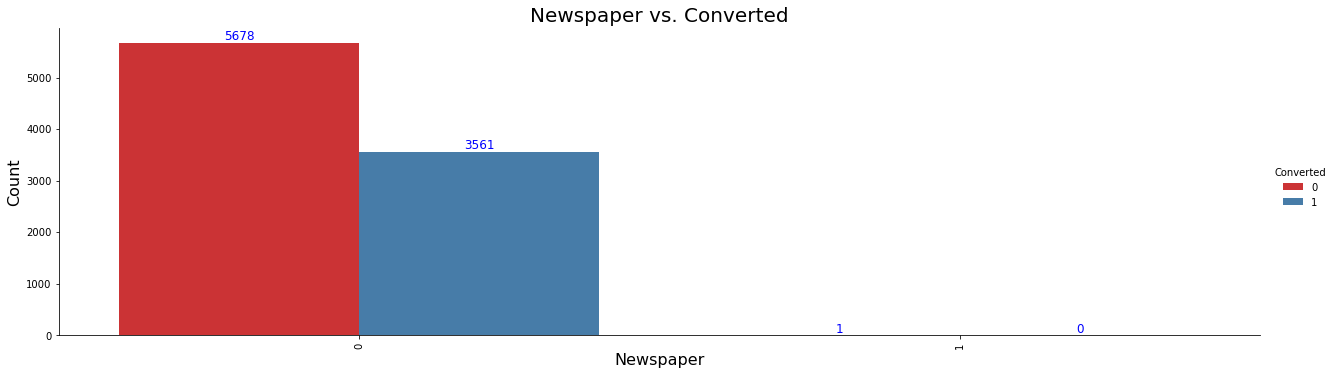

In [54]:
cat_converted('Newspaper')

Since Newspaper column has only one row with "Yes" as the value and further since this lead did not get converted and rest of all the values are "No", we can safely drop the column.

In [55]:
# Dropping Newspaper column

edu_df = edu_df.drop(['Newspaper'], axis=1)

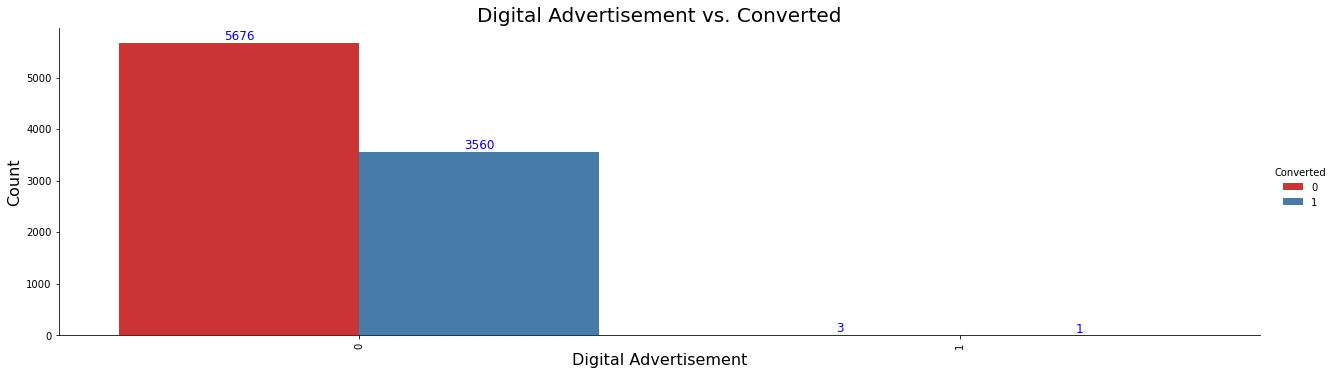

In [56]:
# Digital Advertisement

cat_converted('Digital Advertisement')

It can be noticed above that there were 2 leads that came from digital advertisement of which one lead got converted.

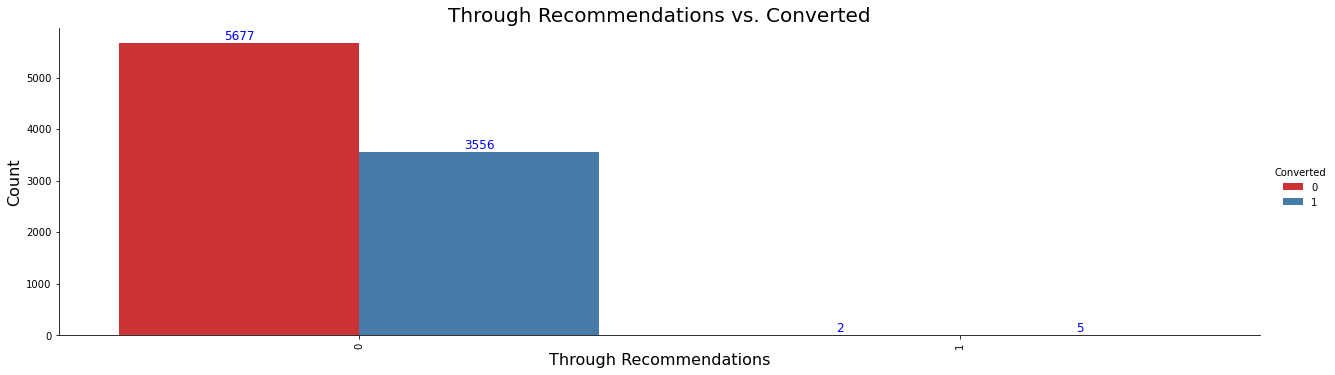

In [57]:
# Through Recommendations

cat_converted('Through Recommendations')

It can be seen that only a total of 7 leads came through recommendations of which 5 leads got converted.

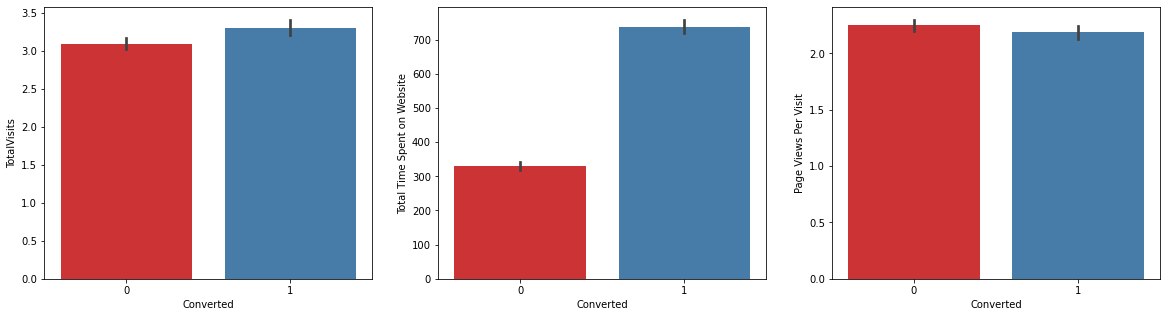

In [58]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set1', data = edu_df)
plt.subplot(1,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set1', data = edu_df)
plt.subplot(1,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set1', data = edu_df)
plt.show()

The conversion rated were high for Total Visits, Total Time Spent on Website and Page Views Per Visit

Data sucessfully analysed and descreptive inferences have been derived.

# Dummy creation

After converting the binary categories from 'Yes' to 1 and 'No' to 0, **we will use now dummy variables for mutiple levels of categories.**

In [59]:
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   int64  
 3   Do Not Call                                    9240 non-null   int64  
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   What is your current occupation                9240 

In [60]:
cat_col

Index(['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'Last Notable Activity'],
      dtype='object')

In [61]:
# Creating a dummy variables for categorical columns and dropping the first level.

dummy=pd.get_dummies(edu_df[cat_col],drop_first=True)

# Adding these dummies to our original dataset

edu_df=pd.concat([edu_df,dummy],axis=1)

edu_df.shape

(9240, 76)

Removing duplicate columns or repeated columns

In [62]:
# We have created dummies for below categories hence removing the original column

edu_df=edu_df.drop(cat_col,1)

edu_df.shape

(9240, 70)

In [63]:
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 70 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             9240 non-null   int64  
 1   Do Not Call                                                              9240 non-null   int64  
 2   Converted                                                                9240 non-null   int64  
 3   TotalVisits                                                              9240 non-null   float64
 4   Total Time Spent on Website                                              9240 non-null   int64  
 5   Page Views Per Visit                                                     9240 non-null   float64
 6   Search                                                                  

All the variables are now numerical and ready to be analysed further.

Since there are around 70 columns, we will not be looking at the correlation using heat map as we will not be able to infer anything from the heat map due to huge data.
Also, heatmap and correlation coefficients will highlight only corelation and not causation.

# Data Preparation

### Train-Test Split 

In [64]:
# Importing train-test-split method from sklearn - model selection

from sklearn.model_selection import train_test_split

In [65]:
# Separating target varaible from dependent variable

y= edu_df['Converted']     # putting target varaible 'Converted' to a new series 'y'

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [66]:
# Putting dependent variable in a new dataset called 'X'

X= edu_df.drop(['Converted'], axis= 1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [67]:
# Splitting the datset into train and test dataset

X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

Datta has been split successfully. Ne scaling the data for modelling.

### Rescaling the features

In [68]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4715,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7132,0,0,0.181818,0.549296,0.166667,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8954,0,0,0.363636,0.170335,0.221667,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5283,1,0,1.000000,0.532130,1.000000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3003,0,0,0.272727,0.595951,0.500000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [69]:
### Checking the Conversion Rate percentage

converted = (sum(edu_df['Converted'])/len(edu_df['Converted'].index))*100
converted

38.53896103896104

We have conversion rate of almost 39%

# Building a Model

In [70]:
# importing necessary library

import statsmodels.api as sm

In [71]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6406
Model Family:                Binomial   Df Model:                           61
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2678.1
Date:                Tue, 20 Apr 2021   Deviance:                       5356.3
Time:                        16:46:20   Pearson chi2:                 6.61e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      49.6870   3.05e+05      0.000      1.000   -5.99e+05    5.99e+05
Do Not Email                                                               -1.2876      0.205     -6.284      0.000      -1.689      -0.886
Do Not Call                                                                24.2728   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
TotalVisits                                                                 1.3311      0.204      6.523      0.000       0.931       1.731
Total Time Spent on Website                                                 4.3731      0.164     26.636      0.000       4.051       4.695
Page Views Per Visit                                                       -1.1070      0.205     -5.395      0.000      -1.509      -0.705
Search                                                                     -0.5844      0.845     -0.692      0.489      -2.240       1.071
Digital Advertisement                                                     -25.4219   1.49e+05     -0.000      1.000   -2.91e+05    2.91e+05
Through Recommendations                                                     1.4610      1.544      0.946      0.344      -1.565       4.487
Lead Origin_Landing Page Submission                                        -0.0893      0.101     -0.881      0.378      -0.288       0.109
Lead Origin_Lead Add Form                                                   2.7788      0.552      5.032      0.000       1.696       3.861
Lead Origin_Lead Import                                                     1.2876      1.514      0.850      0.395      -1.680       4.255
Lead Origin_Quick Add Form                                                 25.7633   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Direct Traffic                                                -25.0628   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                                      -25.8685   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                                        -24.7172   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Live Chat                                                      -1.5599   2.65e+05   -5.9e-06      1.000   -5.19e+05    5.19e+05
Lead Source_NC_EDM                                                          0.5519   3.05e+05   1.81e-06      1.000   -5.99e+05    5.99e+05
Lead Source_Olark Chat                                                    -23.9960   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lea

From the above summary, we can tell that there are many variable with high p-values. Here we will use RFE for feature selection as we have 70 variables and checking one by one is not an efficient way to do so.

## Using RFE

#### Building Model - Model 1

In [72]:
# Importing necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# creating an object

logreg= LogisticRegression()

In [73]:
# Running rfe for 20 variables

rfem = RFE(logreg,20)

rfem = rfem.fit(X_train,y_train)   # fitting 

In [74]:
# checking for true and false assigned to the variables after rfe

rfem.support_  

array([ True, False,  True,  True,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False,  True,  True,  True,  True, False,
       False,  True, False,  True, False, False,  True,  True,  True,
        True, False, False, False, False, False])

In [75]:
# List of ranking of all the columns as per RFE  

list(zip(X_train.columns, rfem.support_, rfem.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 32),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', False, 20),
 ('Digital Advertisement', False, 14),
 ('Through Recommendations', False, 21),
 ('Lead Origin_Landing Page Submission', False, 37),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 38),
 ('Lead Origin_Quick Add Form', False, 16),
 ('Lead Source_Direct Traffic', False, 4),
 ('Lead Source_Facebook', False, 11),
 ('Lead Source_Google', False, 7),
 ('Lead Source_Live Chat', False, 36),
 ('Lead Source_NC_EDM', False, 30),
 ('Lead Source_Olark Chat', False, 31),
 ('Lead Source_Organic Search', False, 6),
 ('Lead Source_Pay per Click Ads', False, 34),
 ('Lead Source_Press_Release', False, 47),
 ('Lead Source_Reference', False, 33),
 ('Lead Source_Referral Sites', False, 5),
 ('Lead Source_Social Media', False, 15),
 ('Lead Source_WeLearn', False, 28),
 ('Lead Source_Welingak Websi

In [76]:
# selecting columns only which are 'True' in rfem.support_

col=X_train.columns[rfem.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Flexibility & Convenience',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

#### Rebuilding Model - Model 2

In [77]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2740.5
Date:                Tue, 20 Apr 2021   Deviance:                       5481.1
Time:                        16:46:29   Pearson chi2:                 6.62e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       1.4270      0.658      2.170      0.030       0.138       2.716
Do Not Email                                                               -1.4067      0.186     -7.554      0.000      -1.772      -1.042
TotalVisits                                                                 1.0308      0.193      5.348      0.000       0.653       1.409
Total Time Spent on Website                                                 4.0669      0.153     26.589      0.000       3.767       4.367
Page Views Per Visit                                                       -1.6747      0.180     -9.319      0.000      -2.027      -1.322
Lead Origin_Lead Add Form                                                   2.9684      0.200     14.827      0.000       2.576       3.361
Lead Source_Welingak Website                                               22.6341   1.36e+04      0.002      0.999   -2.67e+04    2.67e+04
Last Activity_Converted to Lead                                            -1.1754      0.209     -5.636      0.000      -1.584      -0.767
Last Activity_Email Bounced                                                -1.1033      0.341     -3.238      0.001      -1.771      -0.435
Last Activity_Olark Chat Conversation                                      -1.0862      0.182     -5.957      0.000      -1.444      -0.729
What is your current occupation_Housewife                                  23.1753   4.61e+04      0.001      1.000   -9.02e+04    9.03e+04
What is your current occupation_Student                                    -1.0067      0.686     -1.468      0.142      -2.351       0.337
What is your current occupation_Unemployed                                 -1.4279      0.650     -2.196      0.028      -2.702      -0.153
What is your current occupation_Working Professional                        1.1672      0.673      1.734      0.083      -0.152       2.487
What matters most to you in choosing a course_Flexibility & Convenience    26.3248   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Last Notable Activity_Email Link Clicked                                   -1.8628      0.260     -7.167      0.000      -2.372      -1.353
Last Notable Activity_Email Opened                                         -1.5529      0.088    -17.682      0.000      -1.725      -1.381
Last Notable Activity_Had a Phone Conversation                              1.9180      1.090      1.760      0.078      -0.217       4.054
Last Notable Activity_Modified                                             -1.7579      0.099    -17.814      0.000      -1.951      -1.564
Las

From the above summary, there are some features having high p -values, we will drop these features one by one and create new models repeatedly until all the features attain significant p- value.
<br>Since 'What matters most to you in choosing a course_Flexibility & Convenience' variable has high p-value, we will drop it. 

In [78]:
col = col.drop('What matters most to you in choosing a course_Flexibility & Convenience',1)

#### Rebuilding Model - Model 3

In [79]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2742.4
Date:                Tue, 20 Apr 2021   Deviance:                       5484.9
Time:                        16:46:29   Pearson chi2:                 6.62e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.4301      0.658      2.175      0.030       0.141       2.719
Do Not Email                                            -1.4073      0.186     -7.559      0.000      -1.772      -1.042
TotalVisits                                              1.0291      0.193      5.341      0.000       0.651       1.407
Total Time Spent on Website                              4.0638      0.153     26.575      0.000       3.764       4.363
Page Views Per Visit                                    -1.6785      0.180     -9.342      0.000      -2.031      -1.326
Lead Origin_Lead Add Form                                2.9639      0.200     14.808      0.000       2.572       3.356
Lead Source_Welingak Website                            22.6338   1.36e+04      0.002      0.999   -2.67e+04    2.67e+04
Last Activity_Converted to Lead                         -1.1808      0.208     -5.664      0.000      -1.589      -0.772
Last Activity_Email Bounced                             -1.1054      0.341     -3.245      0.001      -1.773      -0.438
Last Activity_Olark Chat Conversation                   -1.0925      0.182     -5.994      0.000      -1.450      -0.735
What is your current occupation_Housewife               23.1731   4.61e+04      0.001      1.000   -9.03e+04    9.03e+04
What is your current occupation_Student                 -1.0078      0.686     -1.470      0.142      -2.351       0.336
What is your current occupation_Unemployed              -1.4278      0.650     -2.196      0.028      -2.702      -0.153
What is your current occupation_Working Professional     1.1663      0.673      1.733      0.083      -0.153       2.485
Last Notable Activity_Email Link Clicked                -1.8632      0.260     -7.170      0.000      -2.373      -1.354
Last Notable Activity_Email Opened                      -1.5528      0.088    -17.684      0.000      -1.725      -1.381
Last Notable Activity_Had a Phone Conversation           1.9187      1.090      1.761      0.078      -0.217       4.054
Last Notable Activity_Modified                          -1.7531      0.099    -17.781      0.000      -1.946      -1.560
Last Notable Activity_Olark Chat Conversation           -1.8452      0.376     -4.912      0.000      -2.582      -1.109
Last Notable Activity_Page Visited on Website           -2.0589      0.198    -10.399      0.000      -2.447      -1.671
========================================================================================================================
"""

Since 'What is your current occupation_Housewife' variable has high p-value, we will drop it.

In [80]:
col = col.drop('What is your current occupation_Housewife',1) 

#### Rebuilding Model - Model 4

In [81]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.8
Date:                Tue, 20 Apr 2021   Deviance:                       5487.6
Time:                        16:46:30   Pearson chi2:                 6.63e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.8691      0.590      3.167      0.002       0.712       3.026
Do Not Email                                            -1.4076      0.186     -7.560      0.000      -1.773      -1.043
TotalVisits                                              1.0206      0.193      5.298      0.000       0.643       1.398
Total Time Spent on Website                              4.0676      0.153     26.598      0.000       3.768       4.367
Page Views Per Visit                                    -1.6757      0.180     -9.326      0.000      -2.028      -1.323
Lead Origin_Lead Add Form                                2.9645      0.200     14.817      0.000       2.572       3.357
Lead Source_Welingak Website                            22.6319   1.36e+04      0.002      0.999   -2.67e+04    2.67e+04
Last Activity_Converted to Lead                         -1.1843      0.208     -5.681      0.000      -1.593      -0.776
Last Activity_Email Bounced                             -1.1072      0.341     -3.250      0.001      -1.775      -0.439
Last Activity_Olark Chat Conversation                   -1.0996      0.182     -6.028      0.000      -1.457      -0.742
What is your current occupation_Student                 -1.4462      0.622     -2.327      0.020      -2.664      -0.228
What is your current occupation_Unemployed              -1.8663      0.582     -3.205      0.001      -3.008      -0.725
What is your current occupation_Working Professional     0.7279      0.608      1.198      0.231      -0.463       1.919
Last Notable Activity_Email Link Clicked                -1.8599      0.259     -7.171      0.000      -2.368      -1.352
Last Notable Activity_Email Opened                      -1.5534      0.088    -17.689      0.000      -1.725      -1.381
Last Notable Activity_Had a Phone Conversation           1.9203      1.090      1.762      0.078      -0.215       4.056
Last Notable Activity_Modified                          -1.7509      0.099    -17.768      0.000      -1.944      -1.558
Last Notable Activity_Olark Chat Conversation           -1.8380      0.376     -4.892      0.000      -2.574      -1.102
Last Notable Activity_Page Visited on Website           -2.0598      0.198    -10.398      0.000      -2.448      -1.672
========================================================================================================================
"""

Since 'Lead Source_Welingak Website' variable has high p-value, we will drop it.

In [82]:
col = col.drop('Lead Source_Welingak Website',1)

#### Rebuilding Model - Model 5

In [83]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2753.9
Date:                Tue, 20 Apr 2021   Deviance:                       5507.8
Time:                        16:46:30   Pearson chi2:                 6.92e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.8536      0.593      3.128      0.002       0.692       3.015
Do Not Email                                            -1.3927      0.185     -7.534      0.000      -1.755      -1.030
TotalVisits                                              1.0195      0.192      5.297      0.000       0.642       1.397
Total Time Spent on Website                              4.0635      0.153     26.569      0.000       3.764       4.363
Page Views Per Visit                                    -1.6746      0.180     -9.326      0.000      -2.027      -1.323
Lead Origin_Lead Add Form                                3.2792      0.196     16.720      0.000       2.895       3.664
Last Activity_Converted to Lead                         -1.1841      0.208     -5.683      0.000      -1.592      -0.776
Last Activity_Email Bounced                             -1.1579      0.343     -3.372      0.001      -1.831      -0.485
Last Activity_Olark Chat Conversation                   -1.1006      0.182     -6.037      0.000      -1.458      -0.743
What is your current occupation_Student                 -1.4486      0.625     -2.319      0.020      -2.673      -0.224
What is your current occupation_Unemployed              -1.8498      0.585     -3.162      0.002      -2.996      -0.703
What is your current occupation_Working Professional     0.7305      0.610      1.197      0.231      -0.466       1.927
Last Notable Activity_Email Link Clicked                -1.8550      0.259     -7.175      0.000      -2.362      -1.348
Last Notable Activity_Email Opened                      -1.5532      0.088    -17.699      0.000      -1.725      -1.381
Last Notable Activity_Had a Phone Conversation           1.9199      1.090      1.762      0.078      -0.215       4.055
Last Notable Activity_Modified                          -1.7488      0.098    -17.774      0.000      -1.942      -1.556
Last Notable Activity_Olark Chat Conversation           -1.8376      0.376     -4.889      0.000      -2.574      -1.101
Last Notable Activity_Page Visited on Website           -2.0544      0.197    -10.407      0.000      -2.441      -1.667
========================================================================================================================
"""

Since 'What is your current occupation_Working Professional' variable has high p-value, we will drop it.

In [84]:
col = col.drop('What is your current occupation_Working Professional',1)

#### Rebuilding Model - Model 6

In [85]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2754.6
Date:                Tue, 20 Apr 2021   Deviance:                       5509.2
Time:                        16:46:30   Pearson chi2:                 6.89e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              2.5315      0.192     13.192      0.000       2.155       2.908
Do Not Email                                      -1.3908      0.185     -7.530      0.000      -1.753      -1.029
TotalVisits                                        1.0129      0.192      5.262      0.000       0.636       1.390
Total Time Spent on Website                        4.0640      0.153     26.571      0.000       3.764       4.364
Page Views Per Visit                              -1.6722      0.180     -9.314      0.000      -2.024      -1.320
Lead Origin_Lead Add Form                          3.2781      0.196     16.716      0.000       2.894       3.662
Last Activity_Converted to Lead                   -1.1790      0.208     -5.668      0.000      -1.587      -0.771
Last Activity_Email Bounced                       -1.1565      0.343     -3.371      0.001      -1.829      -0.484
Last Activity_Olark Chat Conversation             -1.1052      0.183     -6.054      0.000      -1.463      -0.747
What is your current occupation_Student           -2.1244      0.280     -7.593      0.000      -2.673      -1.576
What is your current occupation_Unemployed        -2.5256      0.174    -14.553      0.000      -2.866      -2.185
Last Notable Activity_Email Link Clicked          -1.8546      0.258     -7.177      0.000      -2.361      -1.348
Last Notable Activity_Email Opened                -1.5547      0.088    -17.724      0.000      -1.727      -1.383
Last Notable Activity_Had a Phone Conversation     1.9200      1.089      1.762      0.078      -0.215       4.055
Last Notable Activity_Modified                    -1.7505      0.098    -17.797      0.000      -1.943      -1.558
Last Notable Activity_Olark Chat Conversation     -1.8316      0.376     -4.877      0.000      -2.568      -1.096
Last Notable Activity_Page Visited on Website     -2.0567      0.197    -10.416      0.000      -2.444      -1.670
==================================================================================================================
"""

Since 'Last Notable Activity_Had a Phone Conversation' variable has high p-value, we will drop it.

In [86]:
col = col.drop('Last Notable Activity_Had a Phone Conversation',1)

#### Rebuilding Model - Model 7

In [87]:
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2756.9
Date:                Tue, 20 Apr 2021   Deviance:                       5513.8
Time:                        16:46:30   Pearson chi2:                 6.89e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             2.5391      0.192     13.233      0.000       2.163       2.915
Do Not Email                                     -1.3994      0.185     -7.577      0.000      -1.761      -1.037
TotalVisits                                       1.0265      0.192      5.349      0.000       0.650       1.403
Total Time Spent on Website                       4.0574      0.153     26.553      0.000       3.758       4.357
Page Views Per Visit                             -1.6721      0.179     -9.326      0.000      -2.023      -1.321
Lead Origin_Lead Add Form                         3.2794      0.196     16.718      0.000       2.895       3.664
Last Activity_Converted to Lead                  -1.1768      0.208     -5.660      0.000      -1.584      -0.769
Last Activity_Email Bounced                      -1.1524      0.343     -3.359      0.001      -1.825      -0.480
Last Activity_Olark Chat Conversation            -1.1043      0.183     -6.049      0.000      -1.462      -0.746
What is your current occupation_Student          -2.1239      0.280     -7.589      0.000      -2.672      -1.575
What is your current occupation_Unemployed       -2.5238      0.174    -14.543      0.000      -2.864      -2.184
Last Notable Activity_Email Link Clicked         -1.8667      0.258     -7.225      0.000      -2.373      -1.360
Last Notable Activity_Email Opened               -1.5669      0.088    -17.898      0.000      -1.739      -1.395
Last Notable Activity_Modified                   -1.7619      0.098    -17.937      0.000      -1.954      -1.569
Last Notable Activity_Olark Chat Conversation    -1.8438      0.376     -4.909      0.000      -2.580      -1.108
Last Notable Activity_Page Visited on Website    -2.0721      0.197    -10.503      0.000      -2.459      -1.685
=================================================================================================================
"""

Now all the variables now have significant p-values.
<br>Checking VIF for multi-collinearity.

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,6.42
1,TotalVisits,5.75
9,What is your current occupation_Unemployed,5.25
12,Last Notable Activity_Modified,2.97
11,Last Notable Activity_Email Opened,2.12
2,Total Time Spent on Website,2.01
7,Last Activity_Olark Chat Conversation,1.88
0,Do Not Email,1.83
6,Last Activity_Email Bounced,1.75
13,Last Notable Activity_Olark Chat Conversation,1.38


All the variables have VIF values of less than 7. Hence, there are no major multi-collinearity issues. We are not removing 'Page Views Per Visit' 'Total Visits' 'What is your current occupation_Unemployed' because, 
- from business perspective these variables might be important
- we might run the risk of overfitting the model by removing them
- their VIF values are close to 5


Hence, we will finalise this model and use this for further analysis and predictions.

## Running predictions on the train set and evaluating.

In [89]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4715    0.174854
7132    0.642233
8954    0.670194
5283    0.125351
3003    0.528804
478     0.054637
1352    0.665235
3166    0.924708
7700    0.157976
2647    0.054637
dtype: float64

In [90]:
# Reshaping

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.17485425, 0.64223302, 0.67019399, 0.12535085, 0.52880408,
       0.05463659, 0.66523549, 0.92470754, 0.15797564, 0.05463659])

In [91]:
# Creating a dataframe with the actual converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.174854,4715
1,1,0.642233,7132
2,0,0.670194,8954
3,0,0.125351,5283
4,0,0.528804,3003


In [92]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,0,0.174854,4715,0
1,1,0.642233,7132,1
2,0,0.670194,8954,1
3,0,0.125351,5283,0
4,0,0.528804,3003,1


We will now evaluate the results from X_train by confusion matrix and moddel accuracy.

In [93]:
from sklearn import metrics

In [94]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3456  528]
 [ 720 1764]]


In [95]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8070500927643784


Accuracy rate is around 81% which is good. However we will calculate the other metrics as well.

#### Further evaluation

We will now check for the following.

- Sensitivity
- Specificity
- False Positive Rate
- Postitive Predictive Value
- Negative Predictive Value

In [96]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [97]:
# Sensitivity of our logistic regression model

print('Sensitivity: '+ str(TP / float(TP+FN)))

Sensitivity: 0.7101449275362319


In [98]:
# Specificity of our logistic regression model

print('Specificity: '+str(TN / float(TN+FP)))

Specificity: 0.8674698795180723


In [99]:
# Calculate false postive rate - predicting non conversion when leads have converted

print('False postive rate: '+str(FP/ float(TN+FP)))

False postive rate: 0.13253012048192772


In [100]:
# positive predictive value 

print('Positive predictive value: '+str(TP / float(TP+FP)))

Positive predictive value: 0.7696335078534031


In [101]:
# Negative predictive value

print('Negative predictive value: '+str(TN / float(TN+FN)))

Negative predictive value: 0.8275862068965517


We will now dwell further to check the useability of this model. Once proved useful, we will run predictions on the test data and evaluate the results.
<br>We also need to check if the model actually meets the CEO's goal of 80% atleast for train data.

### The ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [102]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [103]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

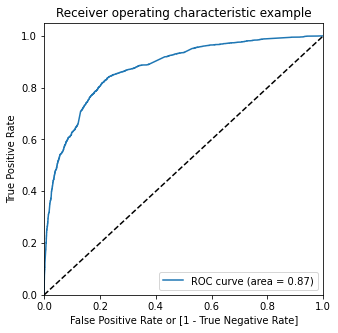

In [104]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

Points to be concluded from above roc curve -
- The curve is closer to the left side of the border than to the right side hence our model is having great accuracy.
- The area under the curve is 87% of the total area.

### Optimal Cutoff Point

Optimal cut off probability is that probability where we get balanced sensitivity and specificity.

In [105]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.174854,4715,0,1,1,0,0,0,0,0,0,0,0
1,1,0.642233,7132,1,1,1,1,1,1,1,1,0,0,0
2,0,0.670194,8954,1,1,1,1,1,1,1,1,0,0,0
3,0,0.125351,5283,0,1,1,0,0,0,0,0,0,0,0
4,0,0.528804,3003,1,1,1,1,1,1,1,0,0,0,0


In [106]:
# calculating accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0  0.0          0.384045  1.000000     0.000000   
0.1  0.1          0.569419  0.974235     0.317018   
0.2  0.2          0.751391  0.880032     0.671185   
0.3  0.3          0.797928  0.836151     0.774096   
0.4  0.4          0.805504  0.782206     0.820030   
0.5  0.5          0.807050  0.710145     0.867470   
0.6  0.6          0.792362  0.582528     0.923193   
0.7  0.7          0.779839  0.501208     0.953564   
0.8  0.8          0.757421  0.415056     0.970884   
0.9  0.9          0.705937  0.248792     0.990964   


We have created points for accuracy , sensitivity and specificity for all probability points from 0.0 to 0.9.
Out of this we have to choose one as a cutoff point and it is probability cutoff = 0.4 because the values of accuracy , sensitivity and specificity are having nearly same value which is an ideal point to consider for as we can't ignore any one from three.

<br><br>Let's plot this data and see the converging point for 'accuracy' , 'sensitivity' and 'specificity'.

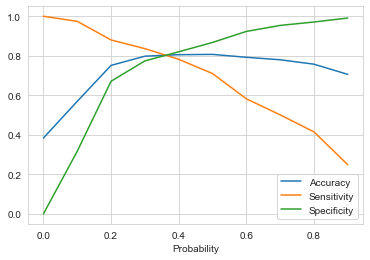

In [107]:
# plotting 'Accuracy', 'Sensitivity' and 'Specificity' for various probabilities.

sns.set_style('whitegrid')
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

0.37 (approx) is the optimum point for taking probability cutoff as the meeting point is slightly before from 0.37 hence final cutoff we choose is 0.37. Also we can see that there is a trade off between sensitivity and specificity.

In [108]:
# Making the final prediction using 0.37 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.174854,4715,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.642233,7132,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.670194,8954,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.125351,5283,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.528804,3003,1,1,1,1,1,1,1,0,0,0,0,1


In [109]:
# calculating lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.174854,4715,0,1,1,0,0,0,0,0,0,0,0,0,17
1,1,0.642233,7132,1,1,1,1,1,1,1,1,0,0,0,1,64
2,0,0.670194,8954,1,1,1,1,1,1,1,1,0,0,0,1,67
3,0,0.125351,5283,0,1,1,0,0,0,0,0,0,0,0,0,13
4,0,0.528804,3003,1,1,1,1,1,1,1,0,0,0,0,1,53
5,0,0.054637,478,0,1,0,0,0,0,0,0,0,0,0,0,5
6,1,0.665235,1352,1,1,1,1,1,1,1,1,0,0,0,1,67
7,1,0.924708,3166,1,1,1,1,1,1,1,1,1,1,1,1,92
8,0,0.157976,7700,0,1,1,0,0,0,0,0,0,0,0,0,16
9,0,0.054637,2647,0,1,0,0,0,0,0,0,0,0,0,0,5


In [110]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]

print((checking_df['final_predicted'].value_counts()[1])/float(len(checking_df)))

0.8007246376811594


Hence we can see that the final prediction of conversions have a target of 80% conversion as per the X Educations CEO's requirement . Hence this is a good model.

## Evaluating final predictions on the train set

- Accuracy
- Confusion Matrix
- Sensitivity
- Specificity
- False Postive Rate
- Positive Predictive Value
- Negative Predicitive Value

In [111]:
# Overall accuracy.

acc= metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print('Accuracy: ',acc)

Accuracy:  0.8031849103277675


In [112]:
# Confusion Matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3206,  778],
       [ 495, 1989]], dtype=int64)

In [113]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [114]:
# Sensitivity

print('Sensitivity: ',TP / float(TP+FN))

Sensitivity:  0.8007246376811594


In [115]:
# Specificity

print('Specificity: ',TN / float(TN+FP))

Specificity:  0.804718875502008


In [116]:
# Calculate false postive rate - predicting conversions when leads has not converted

print('False postive rate',FP/ float(TN+FP))

False postive rate 0.19528112449799198


In [117]:
# Positive predictive value 

print('Positive predictive value: ',TP / float(TP+FP))

Positive predictive value:  0.7188290567401517


In [118]:
# Negative predictive value

print('Negative predictive value: ',TN / float(TN+ FN))

Negative predictive value:  0.8662523642258849


### Precision and Recall

Let's create precision and recall using confusion matrix for the final dataset as we know that to attain more stability and predict successfully in our model one needs to check these two important methods which not only will tell us how our model is but also it will show us some insight like what is the score for result relevancy and how many truly relevant results are returned. 

In [119]:
# Confusion Matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3456,  528],
       [ 720, 1764]], dtype=int64)

In [120]:
from sklearn.metrics import precision_score, recall_score

In [121]:
# Precision

Precision= precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print('Precision: ',Precision)

# Recall

Recall= recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print('Recall: ', Recall)

Precision:  0.7696335078534031
Recall:  0.7101449275362319


### Precision and Recall tradeoff

Precision and Recall are inversely related. Hence we need to see the trade off between these two.
Let's check that in below graph.

In [122]:
from sklearn.metrics import precision_recall_curve

In [123]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6463    0
 6464    0
 6465    1
 6466    0
 6467    1
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       1
 2       1
 3       0
 4       1
        ..
 6463    0
 6464    0
 6465    1
 6466    0
 6467    1
 Name: predicted, Length: 6468, dtype: int64)

In [124]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

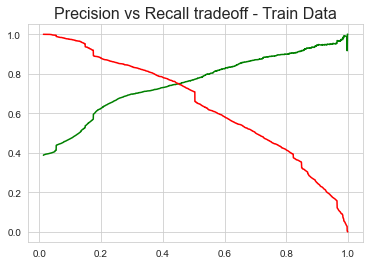

In [125]:
plt.title('Precision vs Recall tradeoff - Train Data', fontsize= 16)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

There is a clear trade off between Precision and Recall and the meeting point is nearly at 0.43.

## Making predictions on the test set

In [126]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [127]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
4608,0,0.727273,0.110915,0.445000,0,0,0,0,0,1,0,1,0,0,0
7935,1,0.181818,0.408891,0.333333,0,0,1,0,0,1,0,0,1,0,0
4043,1,0.090909,0.000880,0.166667,0,0,1,0,1,0,0,0,1,0,0
7821,0,0.181818,0.142165,0.333333,0,0,0,0,0,0,0,1,0,0,0
856,0,0.272727,0.088468,0.500000,0,0,0,0,0,1,0,1,0,0,0


In [128]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [129]:
y_test_pred = res.predict(X_test_sm)

In [130]:
y_test_pred[:10]

4608    0.249906
7935    0.046974
4043    0.016622
7821    0.764646
856     0.148206
927     0.084872
318     0.942049
1018    0.189019
8151    0.422494
1570    0.982988
dtype: float64

In [131]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [132]:
y_pred_1.head()

,0
4608,0.249906
7935,0.046974
4043,0.016622
7821,0.764646
856,0.148206


In [133]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [134]:
# Putting LeadId to index

y_test_df['LeadId'] = y_test_df.index

In [135]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [136]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [137]:
y_pred_final.head()

,Converted,LeadId,0
0,1,4608,0.249906
1,0,7935,0.046974
2,0,4043,0.016622
3,0,7821,0.764646
4,0,856,0.148206


In [138]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [139]:
y_pred_final.head()

,Converted,LeadId,Converted_Prob
0,1,4608,0.249906
1,0,7935,0.046974
2,0,4043,0.016622
3,0,7821,0.764646
4,0,856,0.148206


In [140]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.37%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [141]:
y_pred_final

,Converted,LeadId,Converted_Prob,final_predicted
0,1,4608,0.249906,0
1,0,7935,0.046974,0
2,0,4043,0.016622,0
3,0,7821,0.764646,1
4,0,856,0.148206,0
...,...,...,...,...
2767,0,4184,0.135710,0
2768,0,5023,0.010770,0
2769,0,6661,0.079369,0
2770,0,2201,0.054650,0


In [142]:
# Calculating the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,Converted,LeadId,Converted_Prob,final_predicted,lead_score
0,1,4608,0.249906,0,25
1,0,7935,0.046974,0,5
2,0,4043,0.016622,0,2
3,0,7821,0.764646,1,76
4,0,856,0.148206,0,15
5,0,927,0.084872,0,8
6,1,318,0.942049,1,94
7,0,1018,0.189019,0,19
8,0,8151,0.422494,1,42
9,1,1570,0.982988,1,98


In [143]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]

print((checking_test_df['final_predicted'].value_counts()[1])/float(len(checking_test_df)))

0.8356545961002786


Hence we can see that the final prediction of conversions have a target rate of 84% (Around 4% greater than the predictions made on training data set)

#### Evaluating test set
- Accuracy
- Confusion Metrics
- Sensitivity
- Specificity

In [144]:
# Accuracy

acc= metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
print('Accuracy: ', acc)

Accuracy:  0.8163780663780664


**An accuracy of 82% (>80%) on the test data.**

In [145]:
# Confusion Matrix

confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1363,  332],
       [ 177,  900]], dtype=int64)

In [146]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [147]:
# Sensitivity

print('Sensitivity: ',TP / float(TP+FN))

Sensitivity:  0.8356545961002786


In [148]:
# Specificity

print('Specificity: ',TN / float(TN+FP))

Specificity:  0.8041297935103244


### Precision and Recall - Test set

In [149]:
# Precision
print('Precision: ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('Recall: ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

Precision:  0.7305194805194806
Recall:  0.8356545961002786


Precison percentage is 73% and recall  percentage is 84%.This implies that model explains relevancy of 73% and true relevant results about 84%.

As per business objective, the recall percentage will be more valuable because it is okay if our precision is little low which means less hot lead customers but we don't want to miss out any hot leads which are willing to get converted.

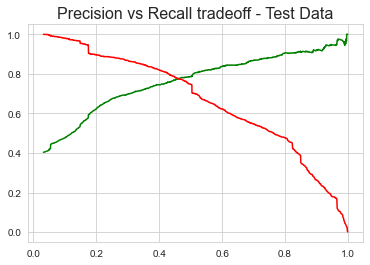

In [150]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)
plt.title('Precision vs Recall tradeoff - Test Data', fontsize= 16)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

There is a clear trade off between Precision and Recall and the meeting point is nearly at 0.43. The graph matches train dataset Precision vs Recall graph.

## Conclusions
    
- We have sucessfully run the model on test and train data and evaluated the results for both of them. The results are coherent and the models seems to be accurate upto 80% on train data and 82% on test data.
- Precision and Recall tradeoff has been evaluated and show by a plot with meetin point at 0.45.
- We have considered a probability cutoff point of 0.37 as this is where the values of accuracy, sensitivity and specificity converged.
- Accuracy, Sensitivity and Specificity values of test set are around 81%, 79% and 82% which are approximately closer to the respective values calculated using trained set.
- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 80% as desired.
 - In business terms, this model has an ability to adjust with the company’s requirements in the coming future.

This concludes that the model is in a stable state and we can successfully draw business related conclusions from it.

 - Important features responsible for good conversion rate or the ones' which contribute the most towards the probability of a lead getting converted are:<br><br>
 
    - **Total Time Spent on Website (coeff.= 4.0574)**
    - **Lead Origin_Lead Add Form (coeff.= 3.2794)** and
    - **What is your current occupation_Unemployed (coeff.= - 2.5238)**